<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
    <i>Aprender una técnica no es un fin en si mismo, simplemente indica por donde hay que empezar</i><br><b>Proverbio Japonés</b></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<i>Material curado y organizado por el Prof. Dr. Hernán D. Merlino</i><br> 
<i>AutoML Regression 1.0 - 2025 Q1</i></p> 
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>AutoML Regression</strong></p> 

In [1]:
from pycaret.regression import * 
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Lectura del File</strong></p> 

In [4]:
dfHousePriceTrain = pd.read_csv("features_sample_2porciento.csv")

In [5]:
dfHousePriceTrain.shape

(335268, 153)

In [6]:
dfHousePriceTrain.head()

,venta_id,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,...,"ROLLING_MEAN(clientes.first_ventas_time, plan_precios_cuidados)","ROLLING_MEAN(clientes.first_ventas_time, sku_size)","ROLLING_MEAN(clientes.first_ventas_time, stock_final)","ROLLING_MEAN(clientes.first_ventas_time, tn)","ROLLING_MEAN(productos.first_ventas_time, cust_request_qty)","ROLLING_MEAN(productos.first_ventas_time, cust_request_tn)","ROLLING_MEAN(productos.first_ventas_time, plan_precios_cuidados)","ROLLING_MEAN(productos.first_ventas_time, sku_size)","ROLLING_MEAN(productos.first_ventas_time, stock_final)","ROLLING_MEAN(productos.first_ventas_time, tn)"
0,0,10166,20003,0.00,0.00,0.00,0.00,0.00,FOODS,ADEREZOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10471,20314,0.00,0.00,0.00,0.00,0.00,PC,CABELLO,...,0.00,475.00,0.00,0.00,0.00,0.00,0.00,475.00,0.00,0.00
2,2,10159,20579,0.00,0.00,0.00,0.00,0.00,PC,CABELLO,...,0.00,242.50,0.00,0.00,0.00,0.00,0.00,242.50,0.00,0.00
3,3,10285,20361,0.00,0.00,0.00,0.00,0.00,HC,VAJILLA,...,0.00,228.33,0.00,0.00,0.00,0.00,0.00,228.33,0.00,0.00
4,4,10577,20691,0.00,0.00,0.00,0.00,0.00,HC,ROPA LAVADO,...,0.00,236.67,0.00,0.00,0.00,0.00,0.00,236.67,0.00,0.00


In [7]:
dfHousePriceTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335268 entries, 0 to 335267
Columns: 153 entries, venta_id to ROLLING_MEAN(productos.first_ventas_time, tn)
dtypes: float64(113), int64(24), object(16)
memory usage: 391.4+ MB


In [8]:
dfHousePriceTrain.describe()

,venta_id,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,sku_size,DIFF(cust_request_qty),...,"ROLLING_MEAN(clientes.first_ventas_time, plan_precios_cuidados)","ROLLING_MEAN(clientes.first_ventas_time, sku_size)","ROLLING_MEAN(clientes.first_ventas_time, stock_final)","ROLLING_MEAN(clientes.first_ventas_time, tn)","ROLLING_MEAN(productos.first_ventas_time, cust_request_qty)","ROLLING_MEAN(productos.first_ventas_time, cust_request_tn)","ROLLING_MEAN(productos.first_ventas_time, plan_precios_cuidados)","ROLLING_MEAN(productos.first_ventas_time, sku_size)","ROLLING_MEAN(productos.first_ventas_time, stock_final)","ROLLING_MEAN(productos.first_ventas_time, tn)"
count,335268.00,335268.00,335268.00,335268.00,335268.00,335268.00,335268.00,335268.00,335268.00,335267.00,...,335267.00,335267.00,335267.00,335267.00,335267.00,335267.00,335267.00,335267.00,335267.00,335267.00
mean,167633.50,10303.68,20536.21,0.00,0.33,0.08,0.08,8.24,453.39,0.00,...,0.00,453.39,8.24,0.08,0.33,0.08,0.00,453.39,8.24,0.08
std,96783.68,179.84,351.72,0.04,1.82,1.38,1.32,39.74,863.18,2.57,...,0.02,501.04,24.23,0.76,1.06,0.80,0.02,501.04,24.23,0.76
min,0.00,10001.00,20001.00,0.00,0.00,0.00,0.00,-13.67,1.00,-70.00,...,0.00,4.67,-5.12,0.00,0.00,0.00,0.00,4.67,-5.12,0.00
25%,83816.75,10148.00,20238.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,...,0.00,186.67,0.00,0.00,0.00,0.00,0.00,186.67,0.00,0.00
50%,167633.50,10297.00,20502.00,0.00,0.00,0.00,0.00,0.00,220.00,0.00,...,0.00,308.33,0.00,0.00,0.00,0.00,0.00,308.33,0.00,0.00
75%,251450.25,10460.00,20812.00,0.00,0.00,0.00,0.00,2.89,450.00,0.00,...,0.00,466.67,7.95,0.01,0.33,0.01,0.00,466.67,7.95,0.01
max,335267.00,10637.00,21276.00,1.00,70.00,214.95,201.87,1562.02,10000.00,70.00,...,0.67,5216.67,585.59,67.29,29.33,71.65,0.67,5216.67,585.59,67.29


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Modeling</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Características a Ignorar</strong></p> 

In [9]:
colIgnore = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities']

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Características Categóricas</strong></p> 

In [10]:
colCateg = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','Street','LotShape',
            'LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
            'RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
            'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
            'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleCondition']

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Configuración del Modelo</strong></p> 

In [11]:
exp_1001 = setup(data = dfHousePriceTrain,target='SalePrice',ignore_features= colIgnore,
                 categorical_features=colCateg,normalize = True,
                 log_experiment=True, experiment_name='HousePrice_1001',
                 session_id = 1001)

ValueError: Invalid value for the target parameter. Column SalePrice not found in the data.

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Compare Models</strong></p> 

In [11]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15091.3545,719564559.5860,25707.5875,0.8771,0.1276,0.0892,5.4960
lightgbm,Light Gradient Boosting Machine,17469.1086,841698980.4677,28182.1730,0.8556,0.1442,0.1043,0.7500
gbr,Gradient Boosting Regressor,17115.5111,856288662.1480,28240.6940,0.8523,0.1408,0.1020,0.3720
xgboost,Extreme Gradient Boosting,18342.0661,879422452.1076,29276.3417,0.8423,0.1516,0.1083,0.9670
par,Passive Aggressive Regressor,16179.0387,1027176194.0356,29080.0053,0.8352,0.1351,0.0960,0.3670
br,Bayesian Ridge,17864.8430,1091584268.7298,30631.6816,0.8224,0.1525,0.1087,0.2100
rf,Random Forest Regressor,18556.4061,1040770250.4247,31385.7397,0.8213,0.1571,0.1121,0.9100
omp,Orthogonal Matching Pursuit,17668.5385,1194293759.3200,30916.1697,0.8086,0.1527,0.1081,0.0290
ridge,Ridge Regression,18433.1394,1220082814.8169,31973.7419,0.8027,0.1654,0.1124,0.0530
knn,K Neighbors Regressor,20397.7518,1245969044.1350,33980.4198,0.7894,0.1655,0.1171,0.0700


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generar el mejor modelo</strong></p> 

In [12]:
catboost_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14073.5876,420084888.2805,20495.9725,0.9088,0.1052,0.0795
1,14479.4457,529759030.7188,23016.4948,0.8783,0.1226,0.0872
2,16480.8568,1472511184.0108,38373.3134,0.7628,0.1498,0.0962
3,17905.1856,1721660395.5669,41492.8957,0.7448,0.1334,0.0897
4,15556.7707,530487445.6671,23032.3131,0.8973,0.1444,0.1000
5,13595.9124,380802305.9407,19514.1566,0.9369,0.1355,0.0920
6,14995.0823,467062106.4731,21611.6197,0.9176,0.1259,0.0883
7,15027.4660,472638397.4663,21740.2483,0.9193,0.1245,0.0899
8,12797.0948,342307221.6850,18501.5465,0.9176,0.0978,0.0743
9,16002.1430,858332620.0508,29297.3142,0.8871,0.1369,0.0948


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Hiperparametrización</strong></p> 

In [15]:
#tuned_catboost_model = tune_model(catboost_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16145.8235,535491332.5042,23140.6857,0.8838,0.1215,0.0925
1,16504.6820,694821839.2790,26359.4734,0.8403,0.1441,0.1022
2,18584.3714,1159032908.6341,34044.5724,0.8133,0.1644,0.1154
3,19649.7245,1738628165.6814,41696.8604,0.7423,0.1443,0.1043
4,19928.6209,798632600.6137,28260.0885,0.8454,0.1818,0.1335
5,17875.3954,647636161.6255,25448.6967,0.8928,0.1620,0.1175
6,19425.3970,827484059.0522,28766.0226,0.8541,0.1619,0.1171
7,17972.4750,717730875.2457,26790.4997,0.8775,0.1531,0.1083
8,13145.3060,356469956.3942,18880.4120,0.9142,0.1052,0.0796
9,19420.4924,1016996518.4071,31890.3829,0.8662,0.1610,0.1165


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong><u>Métricas:</u></strong><br></p>  
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<a href="https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914" target=\"_blank\">Regression: An Explanation of Regression Metrics And What Can Go Wrong</a><br>
<a href="https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b" target=\"_blank\">3 Best metrics to evaluate Regression Model?</a><br>
<a href="https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/" target=\"_blank\">Know The Best Evaluation Metrics for Your Regression Model !</a><br>
<a href="https://www.iartificial.net/error-cuadratico-medio-para-regresion/" target=\"_blank\">Error Cuadrático Medio para Regresión</a><br>
</p>  

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Listado de Gráficas</strong></p> 

In [17]:
plot_model?

In [13]:
plot_model(catboost_model, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


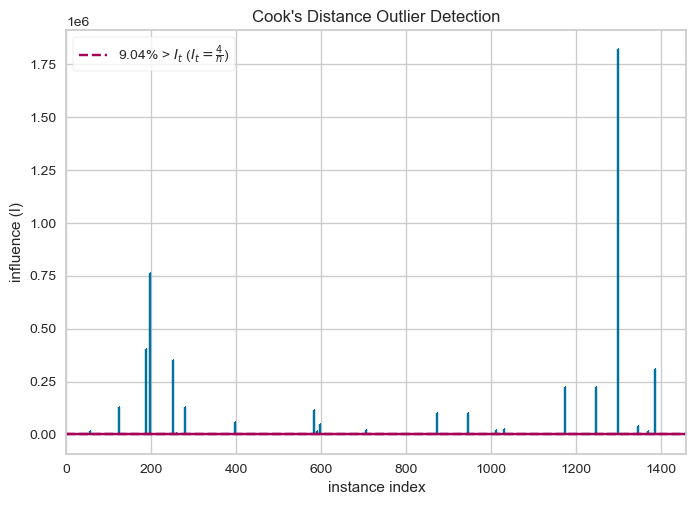

In [14]:
plot_model(catboost_model, plot = 'cooks')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Características mas importantes</strong></p> 

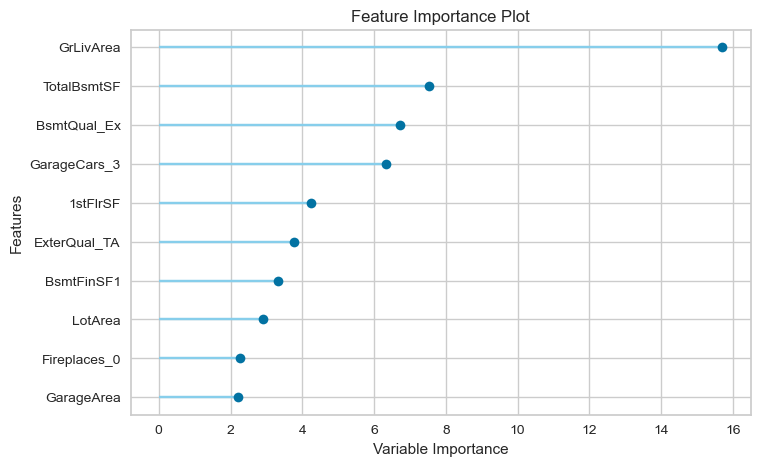

In [15]:
plot_model(catboost_model, plot = 'feature')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de Error de Predicción</strong></p> 

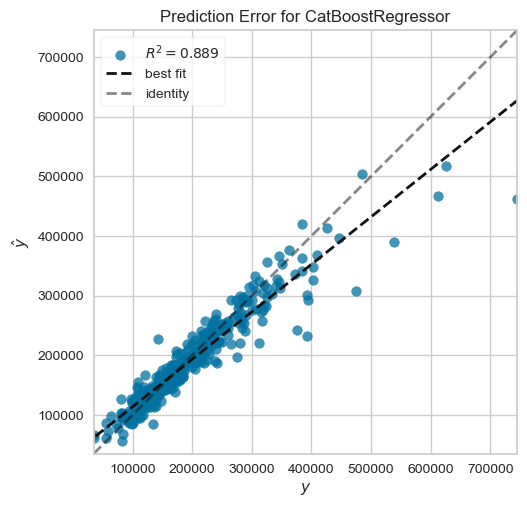

In [16]:
plot_model(catboost_model, plot = 'error')

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Comparación de Errores</strong></p> 

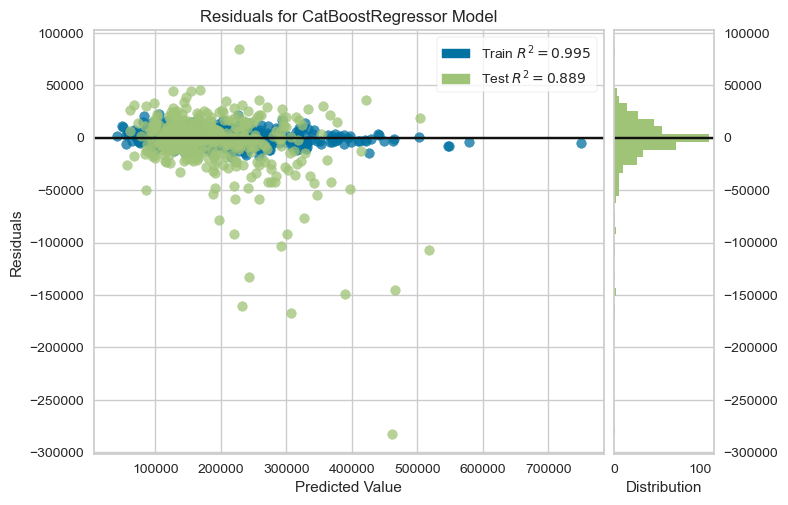

In [17]:
plot_model(catboost_model)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Interpretacion</strong></p> 

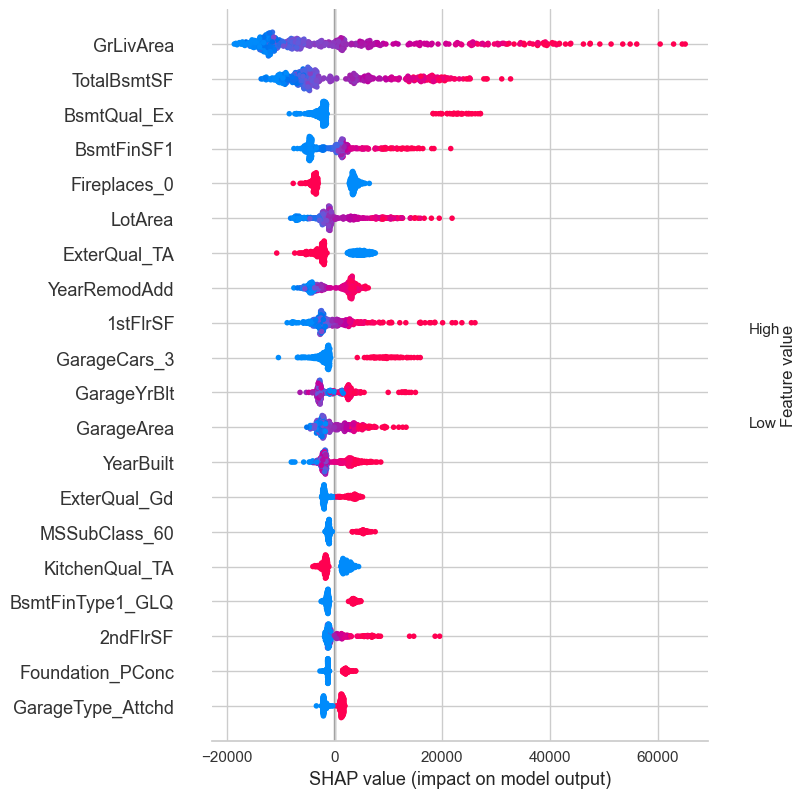

In [18]:
interpret_model(catboost_model)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Predecir Valores y Comaprar con Reales</strong></p> 

In [19]:
predict_model(catboost_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,16113.8262,861367878.0022,29349.0695,0.8888,0.1265,0.0861


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,0.90056,-0.31849,-0.45967,0.53463,-0.55724,0.32883,-0.29619,-0.55141,-0.30178,0.18895,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,149700,152644.64265
1,-0.42782,0.05367,-2.84117,0.48630,-0.55724,-0.97379,-0.29619,0.19894,-0.90352,-0.29238,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,100000,87087.61214
2,0.05925,0.20822,0.99569,0.82462,-0.55724,0.52422,-0.29619,-1.00299,-0.54158,-0.91124,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,215000,240555.94075
3,-0.69349,-0.40382,-1.51811,-1.68862,-0.55724,0.22245,-0.29619,-0.98703,-0.83469,-1.18374,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,103600,121905.02098
4,0.19209,0.30606,-0.19506,-0.96365,0.05115,-0.47228,-0.29619,2.15121,1.51012,1.44194,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,142600,144700.09604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.01497,-0.01762,-0.42659,-1.30197,-0.55161,0.01620,-0.29619,-0.22299,-0.30178,-0.63619,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,114500,117191.72732
435,-0.42782,-0.27538,-0.19506,-0.96365,-0.55724,0.41784,-0.29619,-0.83650,-0.48829,-0.50121,...,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,119900,117214.00638
436,0.01497,-0.36313,-2.01426,0.29297,-0.55724,1.12994,-0.29619,-0.92545,0.15342,-0.87049,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,107500,145937.67187
437,-0.87061,-0.58250,-0.79043,-1.68862,-0.55724,-0.10755,-0.29619,0.11683,-0.09749,-0.40189,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,159000,154540.73368


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Empaquetar Modelo</strong></p> 

In [21]:
final_catboost_model = finalize_model(catboost_model)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Predecir con el modelo Empaquetado</strong></p> 

In [22]:
predict_model(final_catboost_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,5231.1868,44664964.1863,6683.1852,0.9942,0.0444,0.0329


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,0.90056,-0.31849,-0.45967,0.53463,-0.55724,0.32883,-0.29619,-0.55141,-0.30178,0.18895,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,149700,151563.32845
1,-0.42782,0.05367,-2.84117,0.48630,-0.55724,-0.97379,-0.29619,0.19894,-0.90352,-0.29238,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,100000,94514.44399
2,0.05925,0.20822,0.99569,0.82462,-0.55724,0.52422,-0.29619,-1.00299,-0.54158,-0.91124,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,215000,219183.76002
3,-0.69349,-0.40382,-1.51811,-1.68862,-0.55724,0.22245,-0.29619,-0.98703,-0.83469,-1.18374,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,103600,108140.93325
4,0.19209,0.30606,-0.19506,-0.96365,0.05115,-0.47228,-0.29619,2.15121,1.51012,1.44194,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,142600,139607.80026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.01497,-0.01762,-0.42659,-1.30197,-0.55161,0.01620,-0.29619,-0.22299,-0.30178,-0.63619,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,114500,117364.34768
435,-0.42782,-0.27538,-0.19506,-0.96365,-0.55724,0.41784,-0.29619,-0.83650,-0.48829,-0.50121,...,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,119900,114521.00453
436,0.01497,-0.36313,-2.01426,0.29297,-0.55724,1.12994,-0.29619,-0.92545,0.15342,-0.87049,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,107500,120256.60515
437,-0.87061,-0.58250,-0.79043,-1.68862,-0.55724,-0.10755,-0.29619,0.11683,-0.09749,-0.40189,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,159000,157566.16401


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Salvar Modelo</strong></p> 

In [24]:
save_model(final_catboost_model,'./model/202011110_final_catboost_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['MSZoning',
                                                             'Exterior1st',
                                                             'Exterior2nd',
                                                             'KitchenQual',
                                                             'Functional',
                                                             'SaleType',
                                                             'Street',
                                                             'LotShape',
                                                             'LandContour',
                                                             'LotConfig',
                                                             'LandSlope',
                                                             'Neighborhood',
                                                       

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Manejo de Experimento</strong></p> 

In [25]:
!mlflow ui

^C


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Producción</strong></p> 

In [40]:
from pycaret.regression import * 
import pandas as pd

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Cargar Modelo</strong></p> 

In [47]:
final_catboost_model_loaded = load_model('./model/202011110_final_catboost_model')

Transformation Pipeline and Model Successfully Loaded


In [42]:
dfHousePriceTest = pd.read_csv("./data/house_price_test.csv")

In [43]:
dfHousePriceTest.shape

(1459, 80)

In [44]:
dfHousePriceTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [45]:
dfHousePriceTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [46]:
dfHousePriceTest.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Predecir valores en Producción</strong></p> 

In [48]:
test_predictions = predict_model(final_catboost_model_loaded, data=dfHousePriceTest)

In [49]:
test_predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,139653.915864
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,177522.888510
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,205891.569222
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,207901.211719
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,194438.412871


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 